# Canadian Cannabis Market investment opportunities - Part 2

As it has been only one year since Cannabis Act (legalization of Cannabis in Canada), we will keep our focus on the on data visualisation in order to choose the best canadian province to invest in **Cannabis Retail Business**, the statisctal inferences requires consequent datasets in order to build relaible machine learning models, hence the avaialble 365 days data won't be sufficient, thus the choice to keep our focus at this stage on data visualisation.  

This notebook will be deidcated to parse, get, clean and visualise the following datasets:  

- Candian population by province  
- Canadian GDP by Province  
- Number of cannabis retailers by province  
- Cannabis sales  
- Geolocation coordinates by province  


# Table contents  

A- Candian population by province  
B- Canadian GDP by Province  
C- Number of cannabis retailers by province  
D- Cannabis sales  
E- Geolocation coordinates by province  



We will start with importing  dependencies

In [16]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from pandas.io.html import read_html # tranform HTML file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Dependencies imported.')

Dependencies imported.


## 1. Parse, get and Clean Data


### A- Canadian population by province

In this section we will rank the canadian provinces based on the population saize.

#### Parse dataset

In [2]:
# Parse wikipedia for Canada's population by province
link= 'https://en.wikipedia.org/wiki/List_of_Canadian_provinces_and_territories_by_population'
can_pop = pd.read_html(link , match='.+',index_col=None,  header=1, attrs={'class':'wikitable'})[0] 
can_pop.head(3)

Total        Proportion   Total.1 Proportion.1 Total.2  Proportion.2  \
0     1           Ontario  13448494       38.26%    4.6%     908699.33   
1     2            Quebec   8164361       23.23%    3.3%    1356625.27   
2     3  British Columbia   4648055       13.22%    5.6%     922503.01   

   Unnamed: 6  Unnamed: 7 Unnamed: 8  Unnamed: 9 Unnamed: 10 Unnamed: 11  
0        14.8         121      35.8%    14566547      38.73%       7.75%  
1         6.0          78      23.1%     8484965      22.59%       3.53%  
2         5.0          42      12.4%     5071336      13.46%       8.31%

#### Clean dataset

In [10]:
# Rename Columns
pop= can_pop.rename(columns={'Proportion':'Province', 'Total.1':'Total Population', 'Proportion.1':'%'})

# Sort provinces based on their population 
pop.sort_values(by= 'Total Population', ascending=False) 

# Drop the balance columns 
pop_clean=pop.drop(columns=['Total','Total.2','Proportion.2', 'Unnamed: 6', 'Unnamed: 7',
                                    'Unnamed: 8', 'Unnamed: 9','Unnamed: 10', 'Unnamed: 11'], axis=1)
pop_clean= pop_clean.drop(pop_clean.index[13])
pop_clean.head()

Province  Total Population       %
0           Ontario          13448494  38.26%
1            Quebec           8164361  23.23%
2  British Columbia           4648055  13.22%
3           Alberta           4067175  11.57%
4          Manitoba           1278365   3.64%

## Visualize our findings using Folium Library

In [5]:
latitude = 56.1303673
longitude =  -106.3467712

Canada_geo = r'canada_geo.json'
Canada_map = folium.Map(location=[latitude, longitude], zoom_start=3)

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
Canada_map.choropleth(
    geo_data=Canada_geo,
    data=pop_clean,
    columns=['Province', 'Total Population'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='CANADA POPULATION BY PROVINCE'
)

# display map
Canada_map

C:\Users\bokta\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


The four provinces with the most population are Ontario, Quebec, British Columnbia and Alberta

#### Save Dataframe to a CSV File 

We will save our dataset for the last part of this study.

In [6]:
# Save the dataframe to CSV file 
pop_clean.to_csv('can_pop.csv') # Save the dataset as csv file

### B- Canadian GDP & GDP per capita by province

Canadian GDP & GDP per capita are good indicators of the provinces wealth creation, hence will add an other layer to our decision making by having an insight of the consumming power of our market.

#### Parse dataset

In [12]:
# Parse Wikipedia to get Canada's gross deomestic product & GDP per capita by province

link= 'https://en.wikipedia.org/wiki/List_of_Canadian_provinces_and_territories_by_gross_domestic_product'
can_gdp=pd.read_html(link , match='.+', header=0,index_col=None, attrs={'class':'wikitable'})[0] 

can_gdp.head()

ProvinceorTerritory  GDP(millionCAD, 2018)  Share ofnational GDP(%, 2018)  \
0              Canada                2223856                         100.00   
1    British Columbia                 295401                          13.28   
2             Alberta                 344812                          15.51   
3        Saskatchewan                  80679                           3.63   
4            Manitoba                  72688                           3.27   

   Population(July 1, 2018)  GDP per capita(CAD, 2018)  
0                  37057765                      60011  
1                   5001170                      59066  
2                   4300721                      80175  
3                   1162978                      69373  
4                   1353403                      53708

#### Clean dataset

In [14]:
# Rename Columns

gdp= can_gdp.rename(columns={"ProvinceorTerritory": "Province", "GDP(millionCAD, 2018)": "GDP_millionCAD",

                                                          'Population(July 1, 2018)': 'Population_2018'})
# Drop the balance columns 
gdp=gdp.drop(columns=['Population_2018','Share ofnational GDP(%, 2018)'], axis=1)

# Drop the first row related to the canadian total GDP
gdp= gdp.drop(0)

# Sort provinces based on their population 

gdp = gdp.sort_values(by= 'GDP_millionCAD', ascending=False)

# Set index
ddp= gdp.reset_index(inplace=True)
gdp= gdp.drop(columns=['index'])
gdp

Province  GDP_millionCAD  GDP per capita(CAD, 2018)
0                     Ontario          857384                      59879
1                      Quebec          439375                      52384
2                     Alberta          344812                      80175
3            British Columbia          295401                      59066
4                Saskatchewan           80679                      69373
5                    Manitoba           72688                      53708
6                 Nova Scotia           44354                      46226
7               New Brunswick           36966                      47950
8   Newfoundland and Labrador           33241                      63243
9        Prince Edward Island            6994                      45539
10      Northwest Territories            4730                     105214
11                    Nunavut            3421                      89698
12                      Yukon            3046                      75002

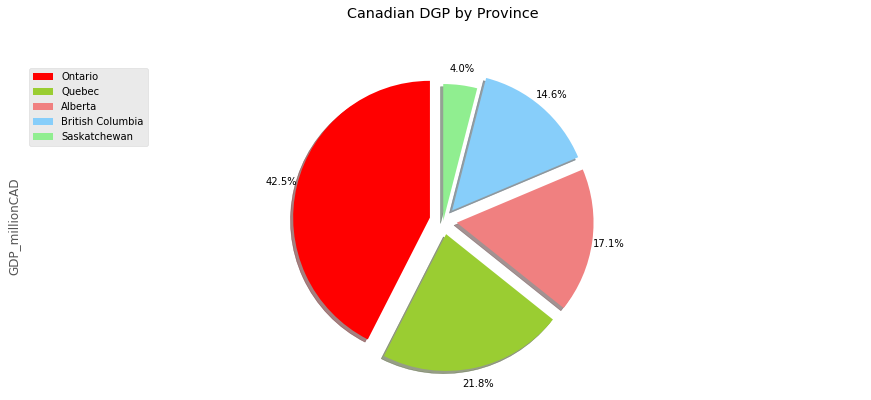

In [21]:
# visulaize our dataframe for 5 provinces with the highest GDP  using matplotlib
GDP_top_5= gdp.loc[0:4]

# set the column, colors and visulaization style
color_list=['red', 'yellowgreen','lightcoral', 'lightskyblue', 'lightgreen','pink']
explode_list=[0.1, 0.1, 0.1, 0.1 ,0] # ratio of each continent with wich to offset each wedge

GDP_top_5['GDP_millionCAD'].plot(kind='pie',
                           figsize=(15,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None, #turn of labels on the chart
                           pctdistance=1.12, # the ratio between the center of each pie slice and the start of the text generated by autopct
                           colors=color_list, # add custom color
                           explode=explode_list # 'explode'lowest 3 continents
                           )

# scale the title up by 12% to match pctdistance
plt.title('Canadian DGP by Province', y=1.12)
plt.axis('equal')

# add legend
plt.legend(labels=GDP_top_5['Province'], loc='upper left')

plt.show()

Ontario has the highest GDP among all provinces followed by Quebec and alberta

In [26]:
# visualize the GDP per capita by province
# create a dataset for GDP per capita
gdp_capita= gdp.drop(columns=['GDP_millionCAD'])

# choose 5 provinces with highest GDP per capita
gdp_cap= gdp_capita.loc[0:4]

# sort the dataframe by value
gdp_cap = gdp_cap.sort_values(by= 'GDP per capita(CAD, 2018)', ascending=False)

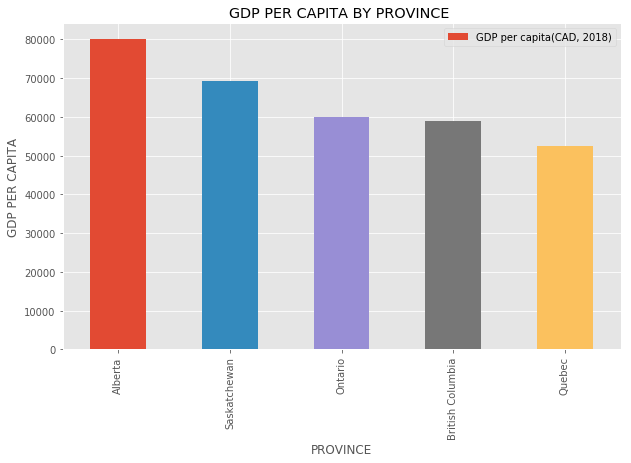

In [27]:
# generate histogram
gdp_cap.plot(kind='bar',x= 'Province',y= 'GDP per capita(CAD, 2018)', figsize=(10, 6))

plt.title('GDP PER CAPITA BY PROVINCE ')
plt.ylabel('GDP PER CAPITA')
plt.xlabel('PROVINCE')

plt.show()

Again the four provinces with the highest GDP are Ontario, Quebec, British Columnbia and Alberta, saskatchewan rank can be explained by the low population compared to the province GDP.

#### Save the dataframe to CSV File

In [28]:
# Save the dataset as csv file

gdp.to_csv('can_gdp.csv') 

At this stage the best 3 provinces to set a Cannabis retail business, based on the market size, GDP and GDP per capita are:  
    - Ontario  
    - Alberta  
    - British Columbia  
however studying the competition will reconfort our decision, of the best province to establish our Cannabis retail business.  

### C- Number of cannabis retailers by province

In this section we will locate the established cannabis retail stores across canada.

#### Parse dataset

In [35]:
# Parse wikipedia to get Canada's cannabis stores by province
link= 'https://en.wikipedia.org/wiki/Cannabis_laws_of_Canada_by_province_or_territory'

can_stores=pd.read_html(link , match='.+', header=0, attrs={'class':'wikitable'})[0] 
can_stores.head(4)

Province Minimum age for use  \
0           Alberta                  18   
1  British Columbia                  19   
2          Manitoba                  19   
3     New Brunswick                  19   

    Allows growing at home for personal use only Home storage limit  \
0                                        Yes[11]           None[12]   
1  Yes but cannot be visible from a public space        1,000 grams   
2         Yes but only with a medical licence[8]           None[15]   
3                                            Yes           None[16]   

  Plants per household                               Allows use in public  \
0              Four[8]              Only where tobacco may be smoked.[12]   
1                 Four  There is a ban on smoking or vaping cannabis i...   
2    Not permitted[12]                                             No[16]   
3             Four[12]                                             No[12]   

  Sold by private retailers (under provincial government oversight)  \
0                                                Yes                  
1                                                Yes                  
2                                                Yes                  
3                                                 No                  

  Sold by public retailers (under provincial government oversight)  \
0                                                Yes                 
1                                                Yes                 
2                                                 No                 
3                                                 No                 

  Sold by government run retail locations   Physical stores  \
0                                     Yes  Currently 17[13]   
1                                     Yes               Yes   
2                                      No  Currently 30[16]   
3                                     Yes  Currently 20[12]   

              Online sales                                       Transporting  
0      Government-operated  Must be secured in closed packaging and not wi...  
1      Government-operated  Must be in a sealed package, or inaccessible t...  
2   Privately-operated[17]  Must be stored in a secure compartment, such a...  
3  Government-operated[12]                                 No restriction[14]

#### Clean dataset

In [30]:
# Drop the first row related to the canadian total GDP

stores = can_stores.drop(columns=['Minimum age for use',
       'Allows growing at home for personal use only', 'Home storage limit',
       'Plants per household', 'Allows use in public',
       'Sold by public retailers (under provincial government oversight)',
       'Sold by government run retail locations', 'Transporting','Online sales',
                                  'Sold by private retailers (under provincial government oversight)'], axis=1)

# delet strings on physical stores column 
# import regex module to proceed with our changes.
import re

stores = stores.replace(regex=['Currently','Introduced on April 1, 2019.', 'No','More to open in coming months', 'five', 'four' ,'Yes'], value='')
stores.head()


Province Physical stores
0                    Alberta          17[13]
1           British Columbia                
2                   Manitoba          30[16]
3              New Brunswick          20[12]
4  Newfoundland and Labrador            [12]

The balance cleaning of our dataset will be done at the CSV file directly, as my current regex module skills are not sufficient to proceed further, and also to add the missing data of certain provinces.

In [32]:
# Save the dataset as csv file
stores = pd.read_csv('can_stores.csv', index_col=0) 
stores.head()

Province  Physical stores
0                    Alberta               18
1           British Columbia                9
2                   Manitoba               14
3              New Brunswick               12
4  Newfoundland and Labrador               12

In [61]:
# visualize competition store number by province
Canada_retail_map = folium.Map(location=[latitude, longitude], zoom_start=3, tiles='Stamen Toner')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
Canada_retail_map.choropleth(
    geo_data=Canada_geo,
    data=stores,
    columns=['Province', 'Physical stores'],
    key_on='feature.properties.NAME',
    fill_color='BuGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='CANADA CANNABIS REATAILERS BY PROVINCE'
)

# display map
Canada_retail_map


C:\Users\bokta\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


As per the map the 3 provinces with the highest number of Cannabis stores are as follow:
    - Ontario
    - Quebec 
    - Alberta
The Cannabis stores dataset added an additional important information about Quebec, 
the province cannabis stores are run by governement,hence no private investement are allowed.
which reduce our choices to Ontario and Alberta.
also during reserach i found out that Alberta economy has been suffering since 2016, from oil prices drop.   
It leave us with only one province which has topped all the selected indicators.

### D- Cannabis Sales since 2014

In this section we will analyze the Cannabis use trend since 2014.  
Eventough the Cannabis act has been voted only in late 2018,   
Health Canada was monitoring the cannabis use trend, which was supplied mainly by black market.  

#### Parse Data

Parsing data from Canada stat was not possible at this stage, hence we have downloaded the dataset as csv file locally.

In [41]:
# load dataset
cannabis_sales = pd.read_csv('cann sales.csv')
cannabis_sales. head()

Quarter  Sales (million USD)
0  2014 Q2                 1474
1  2014 Q3                 1470
2  2014 Q4                 1464
3  2015 Q1                 1456
4  2015 Q2                 1451

In [42]:
# Cannabis consumption in figures
cannabis_sales. describe()

Sales (million USD)
count            21.000000
mean           1437.047619
std              44.645802
min            1368.000000
25%            1399.000000
50%            1445.000000
75%            1464.000000
max            1532.000000

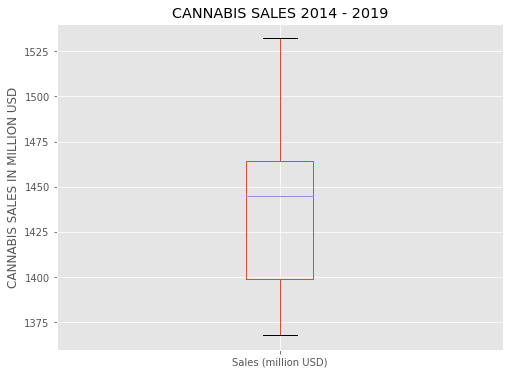

In [43]:
cannabis_sales.plot(kind='box', figsize=(8, 6))

plt.title('CANNABIS SALES 2014 - 2019')
plt.ylabel('CANNABIS SALES IN MILLION USD')

plt.show()

We can immediately make a few key observations from the plot above:  

1. The minimum cannabis quarter sales is around 1.39 Billion USD (min), maximum is around 1.53 Billion USD, and  median quarter sales is around 1.43 Billion USD (median).    

2. 25% of cannabis sales 2014 - 2019 had a quarter sales of ~1.39 Billion USD (First quartile).  

3. 75% of cannabis sales 2014 - 2019 had a quarter sales  of ~1.46 Billion USD(Third quartile).


In [49]:
# create a dataframe
cannabis_sales_1 = cannabis_sales.replace(regex=['Q1','Q2','Q3', 'Q4',], value='')
cannabis_sales_2 = cannabis_sales_1.rename(columns={'Quarter':'Years'})
cannabis_sales_3 = cannabis_sales_2.groupby(['Years']).sum()
cannabis_sales_4 = cannabis_sales_3.reset_index()

In [54]:
cannabis_sales_4.describe()

Sales (million USD)
count             6.000000
mean           5029.666667
std            1102.380092
min            3043.000000
25%            4687.000000
50%            5595.000000
75%            5720.000000
max            5799.000000

In [56]:
cannabis_sales_4.head()

Years  Sales (million USD)
0  2014                  4408
1  2015                  5799
2  2016                  5738
3  2017                  5524
4  2018                  5666

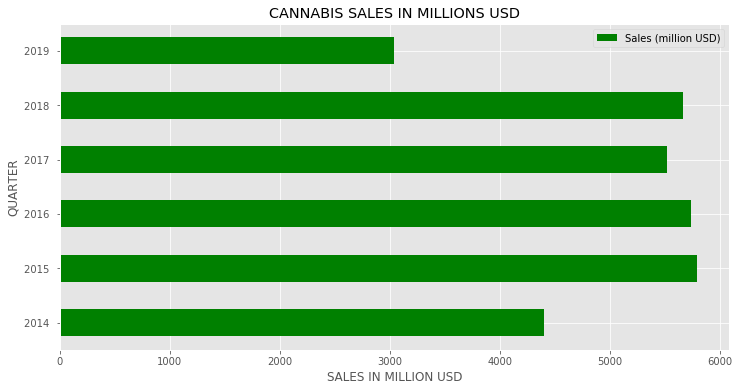

In [53]:

cannabis_sales_4.plot(kind='barh', x= 'Years',y= 'Sales (million USD)',figsize=(12,6), color='g')


plt.title('CANNABIS SALES IN MILLIONS USD')
plt.ylabel('QUARTER')
plt.xlabel('SALES IN MILLION USD')

plt.show()

The horizontal bar plot shows that cannabis annual sales between 2014 and 2019 is an approx. 5 Billion USD,  
2014 and 2019 have lower sales as our dataframe contains only 2 quarter sales related to this specific years.  
hence we can confortably say that the annual sales can reach 5Billion USD.  
Moreover the market is set to grow as the cannabis 2.0 (edibles, beverages, extracts and vape pens) has been legalized recently.  

### E- Geolocation coordinates by province

In this section we will gather the geo coordinates dataset of canadian provinces, as it will be combined with Foursquare API in order to segment & cluster Toronto's neighbourhoods.  
This will allow us to choose the best neighborhood for establishing our cannabis retail business.

#### Parse data

In [58]:
# Parse the goegraphical coordinates of each province
dfs = pd.read_html('https://www.latlong.net/category/provinces-40-60.html', header=0)
geo_coord = dfs[0]

# create a dataframe
geo_coord = geo_coord.rename(columns={'Place Name': 'Province'})
geo_coord.head(3)

Province  Latitude  Longitude
0  Newfoundland and Labrador Province, Canada     53.00      -60.0
1               Saskatchewan Province, Canada     55.00     -106.0
2                Prince Edward Island, Canada     46.25      -63.0

#### Clean Dataset

In [59]:
# Clean data by removing Sub-strings like Province and canada
geo_coord= geo_coord.replace(regex=[' Province',',','Canada'], value='')
geo_coord.head(3)

Province  Latitude  Longitude
0  Newfoundland and Labrador      53.00      -60.0
1               Saskatchewan      55.00     -106.0
2       Prince Edward Island      46.25      -63.0

In [60]:
# Save the dataset as csv file
geo_coord.to_csv('Geo_coord.csv') 